## Продолжим?

In [188]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [189]:
import warnings
pd.set_option("display.max_rows", 10)

from matplotlib import rcParams
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight"})

theme_set(theme_gray(base_size=12))


from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

%pip install adjustText
try:
    from adjustText import adjust_text
except ImportError:
    HAS_ADJUST_TEXT = False
else:
    HAS_ADJUST_TEXT = True



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## Начнём с простого, со всевозможных подписей: к графикам, к осям, к значениям. Подписи добавляются с использованием функции labs(). Вот, например, заголовок графика:

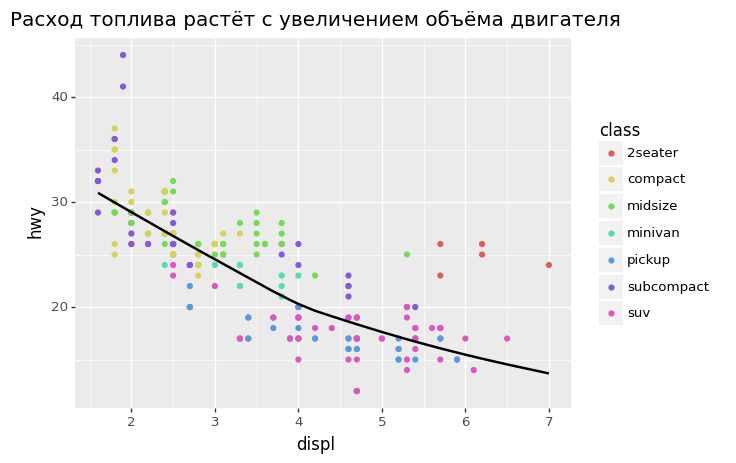

<ggplot: (8732951694412)>

In [191]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
labs(title="Расход топлива растёт с увеличением объёма двигателя")

## Основной целью заголовка является обобщение основного результата наблюдения. Избегайте заголовков, которые просто описывают графики, например,  "Диаграмма зависимости расхода топлива от объёма двигателя".

## Также вы можете использовать labs() для задания названий осей и легенд. Как правило, хорошей идеей будет заменить формальные обозначения категорий на более развёрнутое их описание с указанием размерности (при необходимости).

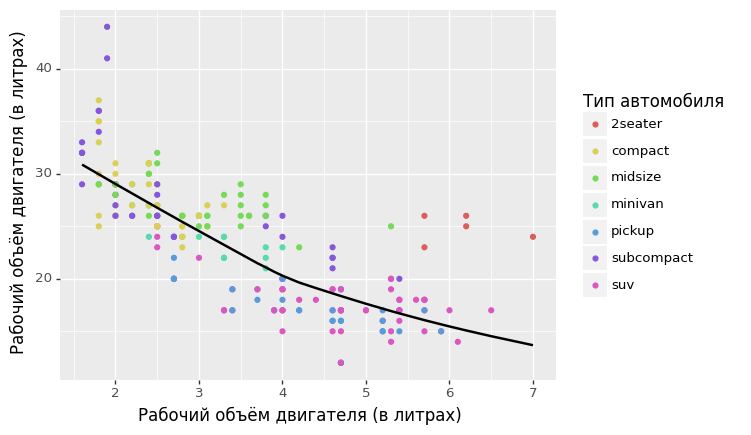

<ggplot: (8732956368321)>

In [192]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
labs(x="Рабочий объём двигателя (в литрах)",
     y="Рабочий объём двигателя (в литрах)",
     colour="Тип автомобиля")

## Можно даже добавить математическое выражение вместо текстовых строк с помощью LaTeX:

In [193]:
# LaTeX не работает
#from matplotlib import rc
#rc('text', usetex=True)

#df = pd.DataFrame({"x": np.random.uniform(size=10),
#                   "y": np.random.uniform(size=10)})

#ggplot(df, aes("x", "y")) +\
#geom_point() +\
#labs(x="$\\sum_{i = 1}^n{x_i^2}$",
#     y="$\\alpha + \\beta + \\frac{\\delta}{\\theta}$")

## Не забудьте потом отключить эту опцию.

In [194]:
# rc('text', usetex=False)

### Создайте график на основе датафрейма mpg с заданными вручную заголовком, и осями x и y.

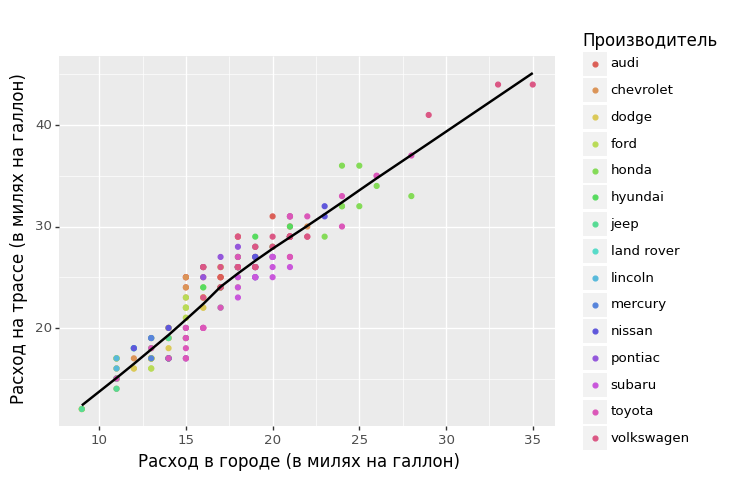

<ggplot: (8732951728812)>

In [195]:
ggplot(mpg, aes("cty", "hwy")) +\
geom_point(aes(colour="manufacturer")) +\
geom_smooth(se=False) +\
labs(x="Расход в городе (в милях на галлон)",
     y="Расход на трассе (в милях на галлон)",
     colour="Производитель")

### Для одного из графиков, сформированных в прошлой лабораторной по собственным данным, придумайте название и подписи к осям.

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
harry_potter = pd.read_csv("/content/drive/MyDrive/Harry_Potter_Scraped_Dataset.csv")

In [198]:
#Чтобы было проще ориентироваться, я просто пронумерую книги. И да, первая и вторая части Седьмой книги объединены.
harry_potter['Book Name'] = ['Harry 1', 'Harry 2', 'Harry 3', 'Harry 4', 'Harry 5', 'Harry 6', 'Harry 7']

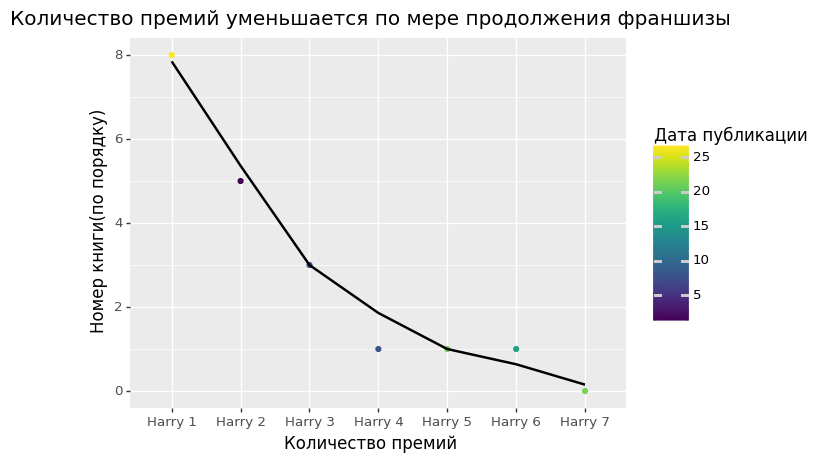

<ggplot: (8732955292944)>

In [199]:

ggplot(data=harry_potter, mapping = aes(x='Book Name', y='Total Awards Won', color='Publish Date')) + geom_point() + geom_smooth(mapping=aes(x='Book Name', y='Total Awards Won', group=1), se=False)+\
labs(
    x="Количество премий",
     y="Номер книги(по порядку)",
     colour="Дата публикации",
     title="Количество премий уменьшается по мере продолжения франшизы")



## Кроме основных элементов графика, можно подписывать и отдельные наблюдения. Сначала попробуем использовать geom_text(). У него все те же свойства, что у geom_point(), но добавляется свойство label.
## В качестве источника данных создадим датафрейм, в который поместим самую эффективную по расходу топлива марку автомобиля для каждого класса.

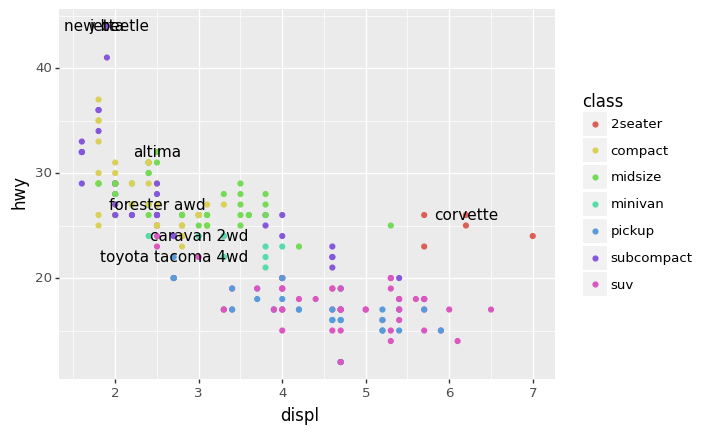

<ggplot: (8732954985259)>

In [200]:
best_in_class = mpg\
.sort_values(by="hwy", ascending=False)\
.groupby("class")\
.first()

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_text(aes(label="model"), data=best_in_class)

## Выглядит не очень. Текст перекрывает как сам себя, так и точки. Немного улучшить ситуацию можно заменив geom_text() на geom_label(), заодно добавив прозрачности и небольшой сдвиг по y.

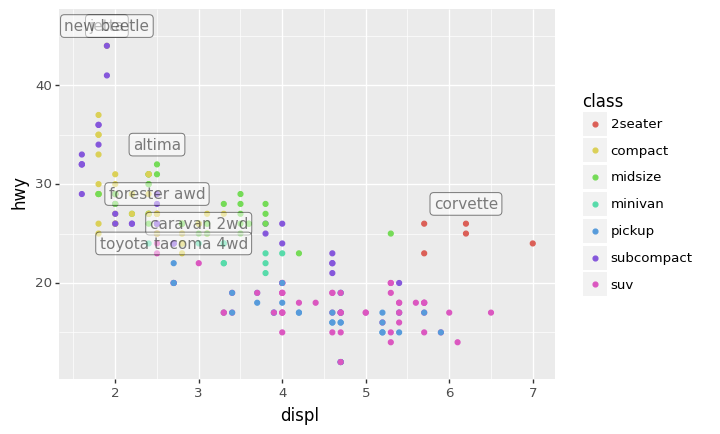

<ggplot: (8732956098567)>

In [201]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_label(aes(label="model"), data=best_in_class, nudge_y=2, alpha=0.5)

## Стало лучше, но в верхнем левом углу надписи всё ещё перекрывают друг друга. Устранить это перекрытие, используя одинаковое смещение для всех текстовых блоков, не получится. К счастью, есть переменная adjust_text.

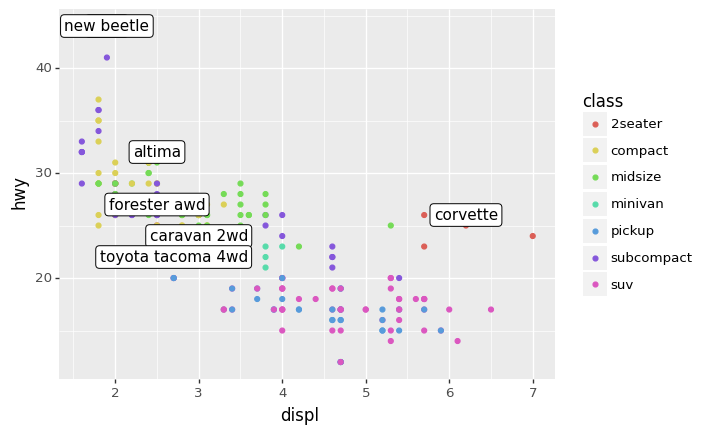

<ggplot: (8732951766544)>

In [202]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_point(data=best_in_class, fill='none') +\
geom_label(aes(label="model"), data=best_in_class)

## Обратите внимание, что мы нарисовали большие чёрные точки поверх выделенных.

## Вместо легенды иногда можно использовать тот же приём. Это не очень приятно выглядит на конкретном графике, но вообще может быть полезным.

<ipython-input-203-23f627aa2173>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


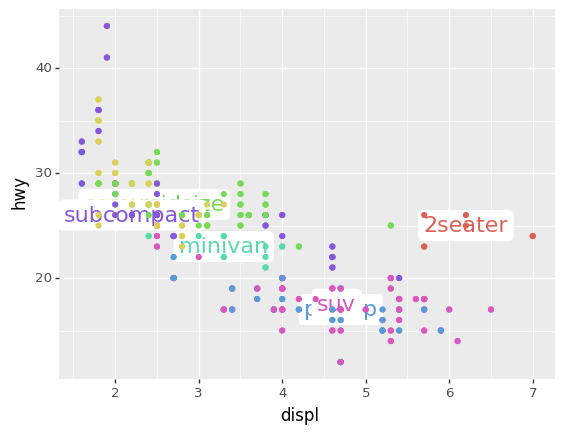

<ggplot: (8732956243923)>

In [203]:
class_avg = mpg\
.groupby("class")["displ","hwy"].median()\
.reset_index()

ggplot(mpg, aes("displ", "hwy", colour="class")) +\
geom_point() +\
geom_label(aes(label="class"), data=class_avg, size=16, label_size=0) +\
geom_point() +\
theme(legend_position="none")

## На график можно добавить и простой фрагмент текста. Но для этого всё равно нужен будет DataFrame. 

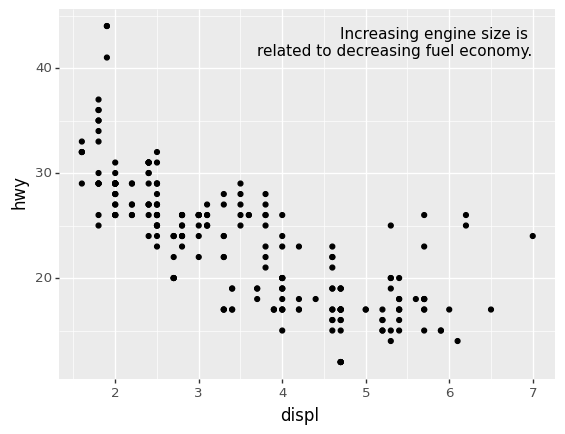

<ggplot: (8732951825683)>

In [204]:
label = pd.DataFrame({"displ": [mpg.displ.max()],
                      "hwy": [mpg.hwy.max()],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Чтобы поместить текст в самый край нужно будет использовтаь `+np.Inf` и `-np.Inf`:

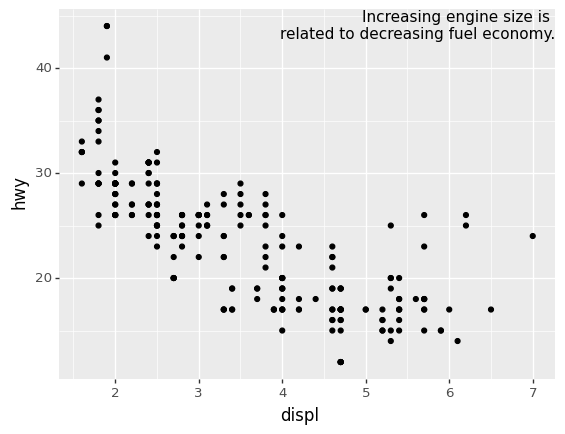

<ggplot: (8732951876398)>

In [205]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Во всех этих примерах перенос слов между строками производился вручную с использованием `"\n"`. Можно использовать функцию `fill` из модуля `textwrap`.

In [206]:
from textwrap import fill

print(fill("Increasing engine size is related to decreasing fuel economy.", width=40))

Increasing engine size is related to
decreasing fuel economy.


## Параметры `ha` и `va` определяют местоположение текста. Все девять вариантов – ниже.

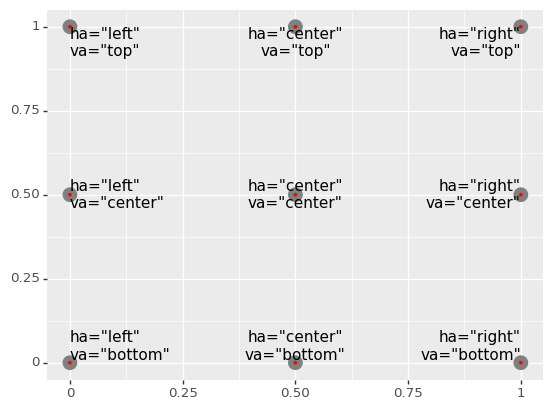

<ggplot: (8732951748672)>

In [207]:
from itertools import product

has = ["left", "center", "right"]
vas = ["top", "center", "bottom"]
xs = [0, 0.5, 1]
ys = [1, 0.5, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(3), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Используйте `geom_text()` с положением в бесконечности, чтобы поместить текст в каждый из четырёх углов графика

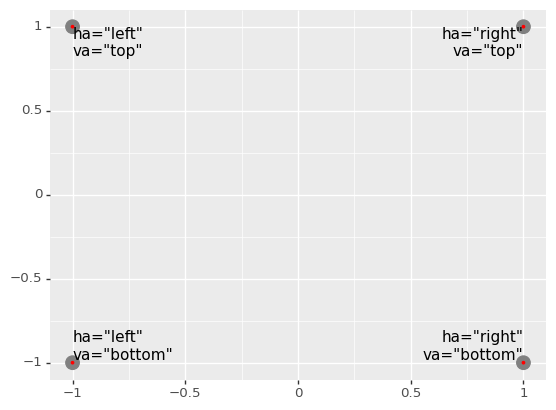

<ggplot: (8732956052116)>

In [208]:
# Для этого достаточно изменить range(3) на range(2)

has = ["left", "right"]
vas = ["top", "bottom"]
xs = [-1, 1]
ys = [1, -1]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(2), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Поэкспериментируйте, как `geom_text()` работает с панелями. Сможете добавить подпись в одну выбранную панель?

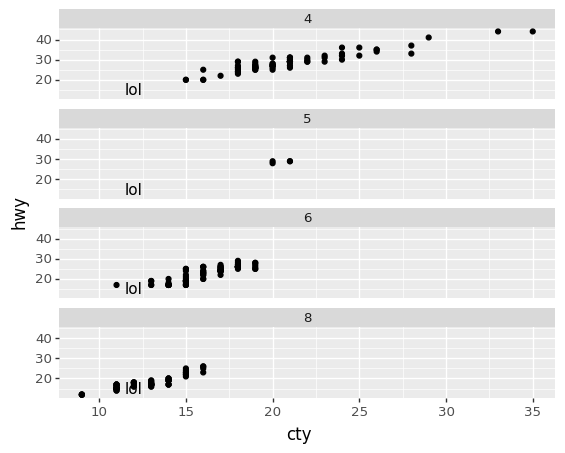

<ggplot: (8732955286224)>

In [209]:
label = pd.DataFrame({
    "text": ["lol"],
    "group": ['audi'],
    "x": [12],
    "y": [15]
})

ggplot(data=mpg) +\
geom_point(mapping=aes(x="cty", y="hwy")) +\
facet_wrap("cyl", nrow=4) +\
geom_text(aes(x='x', y='y', label='text', group='group'), data=label)

### Используйте `geom_hline()` или `geom_vline()` для обозначения пороговых значений.

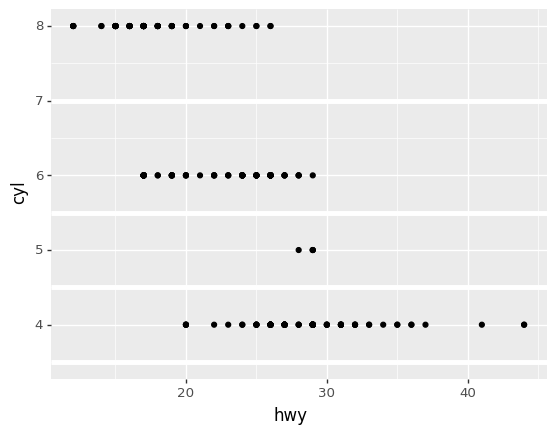

<ggplot: (8732956299599)>

In [210]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="hwy", y="cyl")) +\
geom_hline(size=2, colour='white', yintercept=3.5)+\
geom_hline(size=2, colour='white', yintercept=4.5)+\
geom_hline(size=2, colour='white', yintercept=5.5)+\
geom_hline(size=2, colour='white', yintercept=7)

### Используйте `geom_rect()`, чтобы нарисовать область интереса на графике.

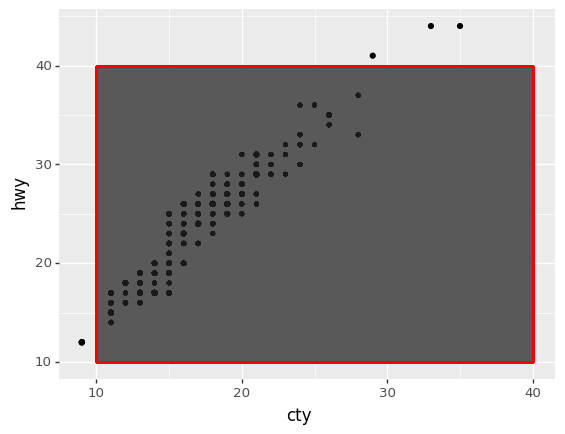

<ggplot: (8732951781389)>

In [211]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="cty", y="hwy")) +\
geom_rect(mapping=aes(xmin=10, xmax=40, ymin=10, ymax=40), color="red", alpha=0.015)

### Используйте `geom_segment()`, чтобы нарисовать стрелку на графике.

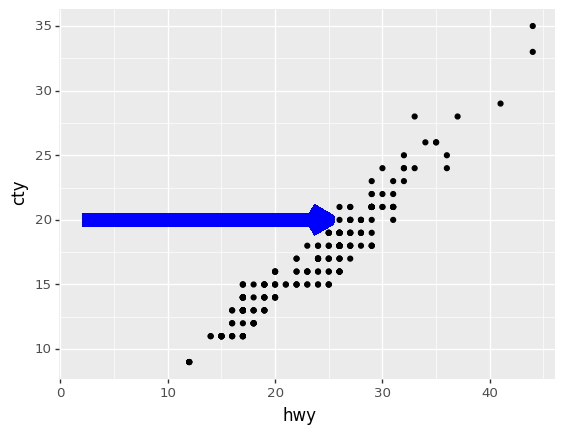

<ggplot: (8732954980440)>

In [212]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="hwy", y="cty")) +\
geom_segment(mapping=aes(x=2, y=20, xend=25, yend=20), arrow=arrow(), size=5, color="blue")

## Ещё один способ улучшить понятность графиков – выбрать правильные масштабы осей.
## Обратите внимание на разницу между `breaks` и `labels`. Первые – это засечки на осях, а вторые – подписи у этих засечек.

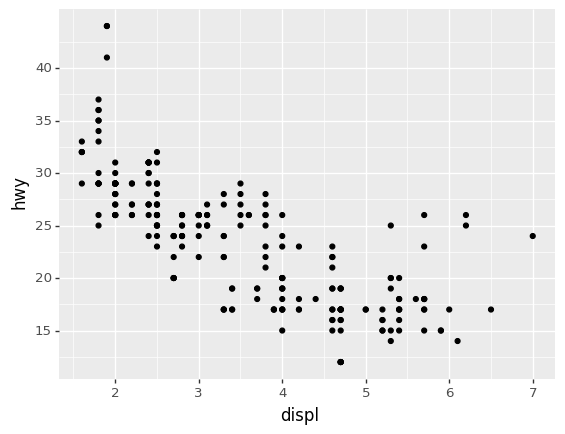

<ggplot: (8732956456310)>

In [213]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_y_continuous(breaks=range(15, 45, 5))

## Можно, например, передать в качестве 'labels' список пустых строк нужного размера.

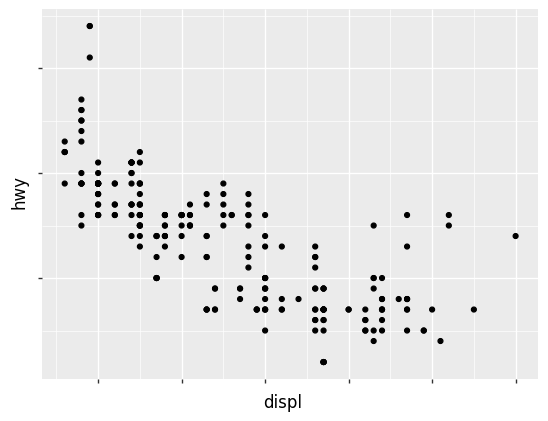

<ggplot: (8732952628863)>

In [214]:
def no_labels(values):
    return [""] * len(values)

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_x_continuous(labels=no_labels) +\
scale_y_continuous(labels=no_labels)

## Можно использовать `breaks` в случае, когда у вас мало конкретных значений, и вам хочется акцентировать внимание именно на них.

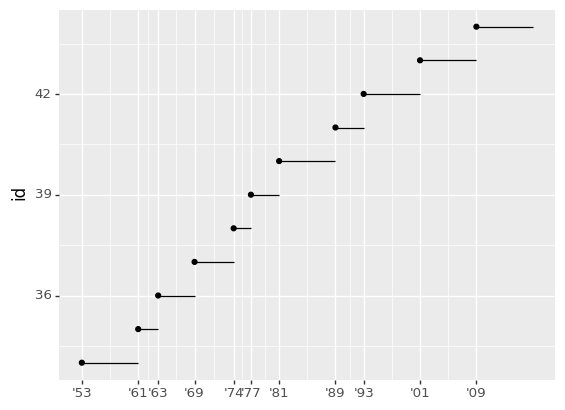

<ggplot: (8732951771751)>

In [215]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_x_date(name="", breaks=presidential.start, date_labels="'%y")

## Местоположение легенды. В целом, всё тривиально.

In [216]:
base = ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))

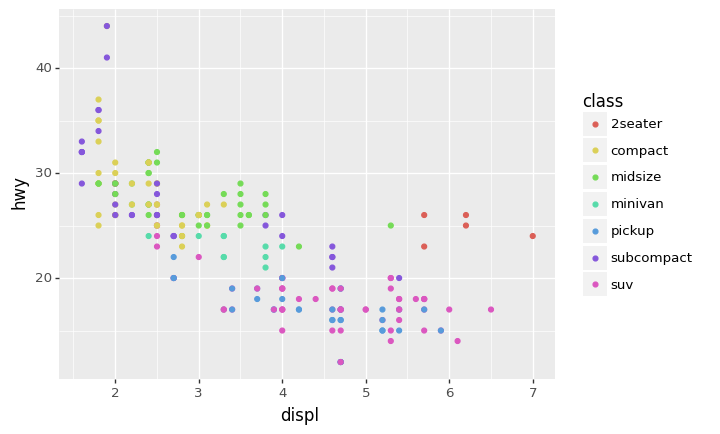

<ggplot: (8732952629002)>

In [217]:
base + theme(legend_position="right")

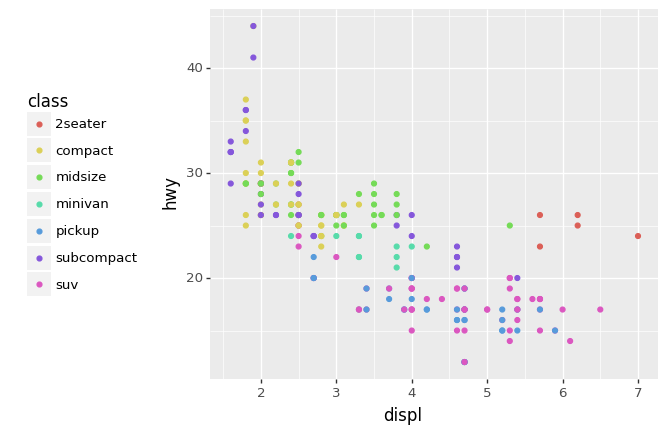

<ggplot: (8732956147288)>

In [218]:
base + theme(subplots_adjust={'left': 0.2}) + theme(legend_position=(0, 0.5))

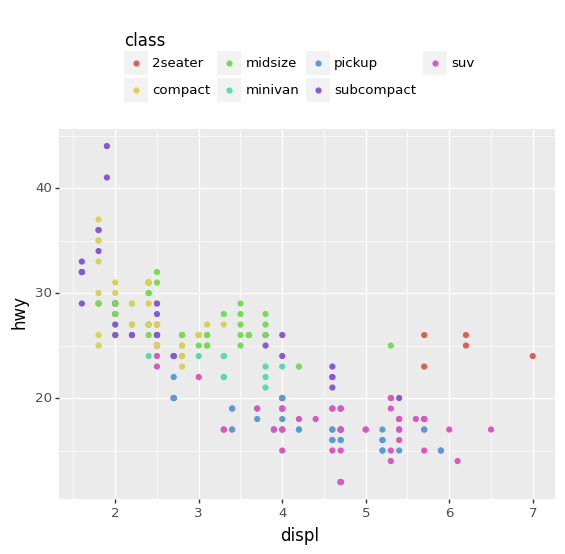

<ggplot: (8732955001811)>

In [219]:
base + theme(legend_position="top")

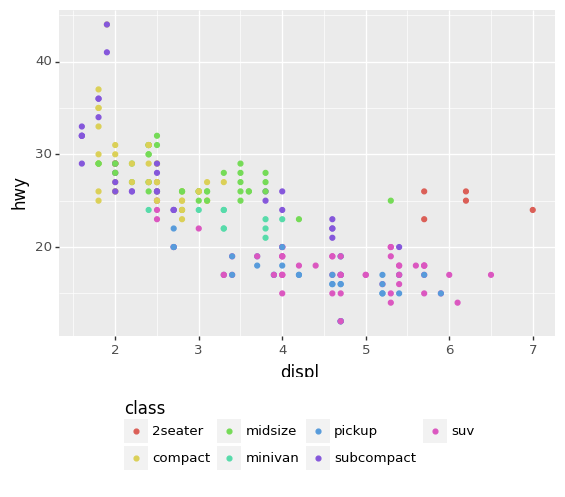

<ggplot: (8732951744082)>

In [220]:
base + theme(subplots_adjust={'bottom': 0.2}, legend_position=(.5, 0), legend_direction='horizontal')

## Можно вообще убрать легенду с помощью `legend_position="none"`.

### С использованием `guides` можно настроить вид легенды ещё более детально.

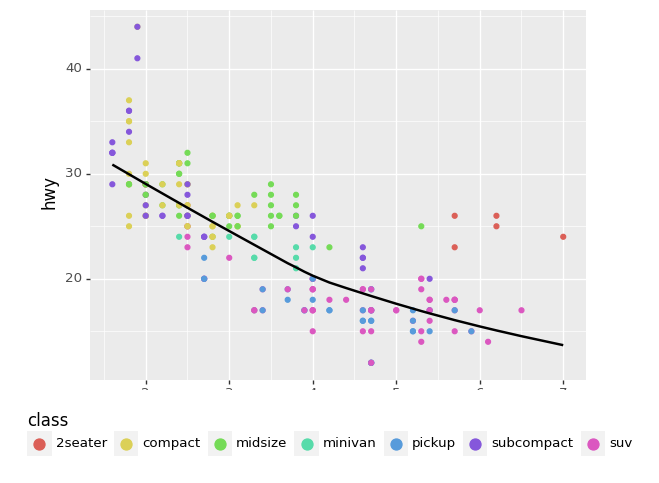

<ggplot: (8732956201120)>

In [221]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
theme(legend_position="bottom") +\
guides(colour=guide_legend(nrow=1, override_aes={"size": 4}))

## Масштаб и шкала осей

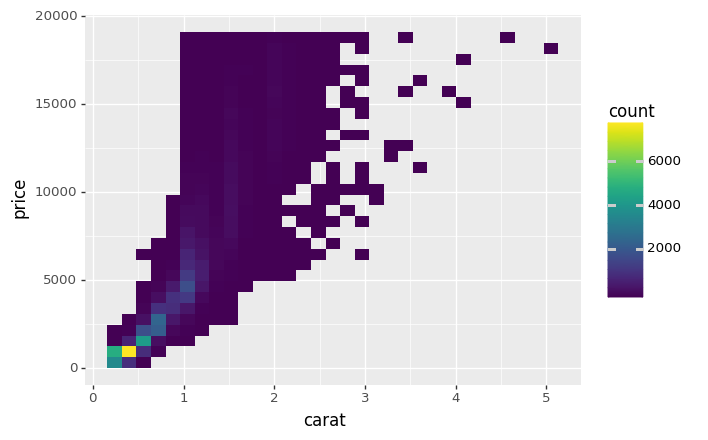

<ggplot: (8732956463168)>

In [222]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d()

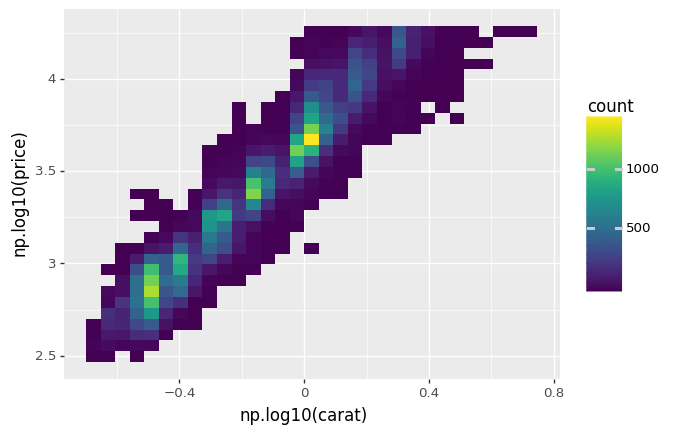

<ggplot: (8732955177771)>

In [223]:
ggplot(diamonds, aes("np.log10(carat)", "np.log10(price)")) +\
geom_bin2d()

## Чтобы значения на осях остались исходными можно воспользоваться переопределением осей: `scale_x_log10()` и `scale_y_log10()`.

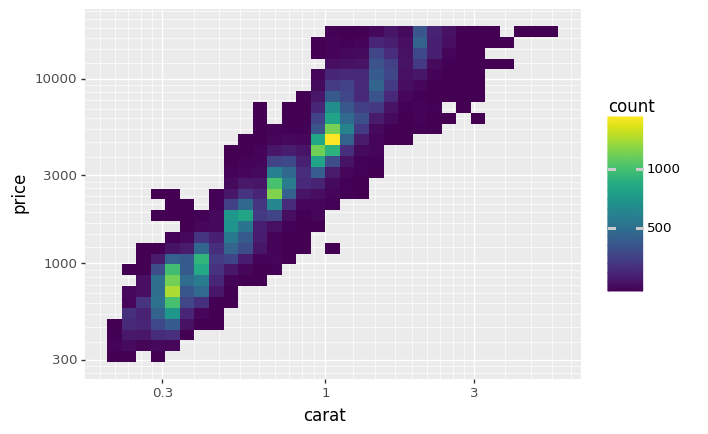

<ggplot: (8732955246011)>

In [224]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d() +\
scale_x_log10() +\
scale_y_log10()

## Также часто переопределяют значения цветов.
## Вот так график выглядит по умолчанию

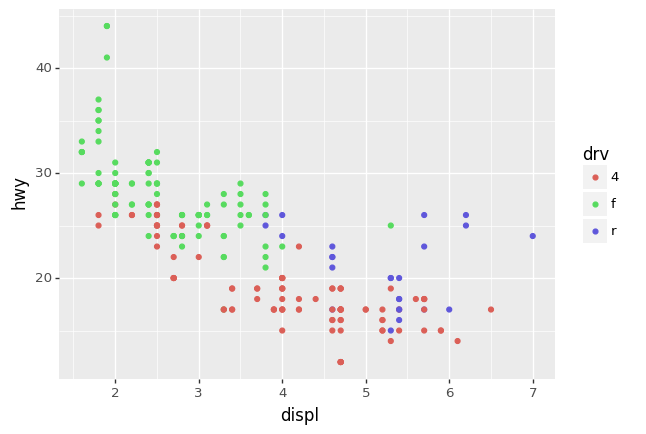

<ggplot: (8732951990236)>

In [225]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv"))

## А так для `palette="Set1"`

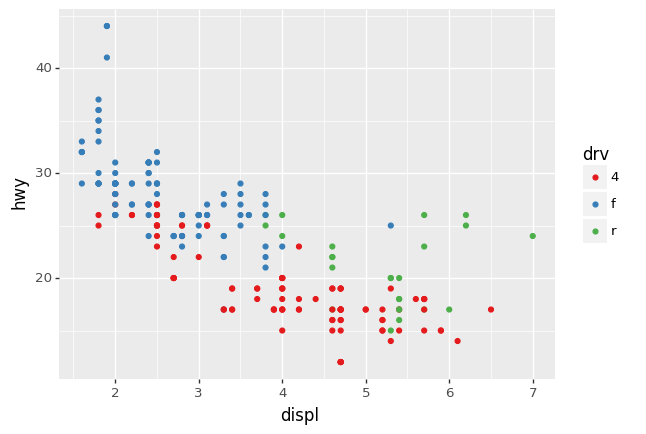

<ggplot: (8732956122338)>

In [226]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## А чтобы было ещё более заметно разницу, можно добавить другую форму.

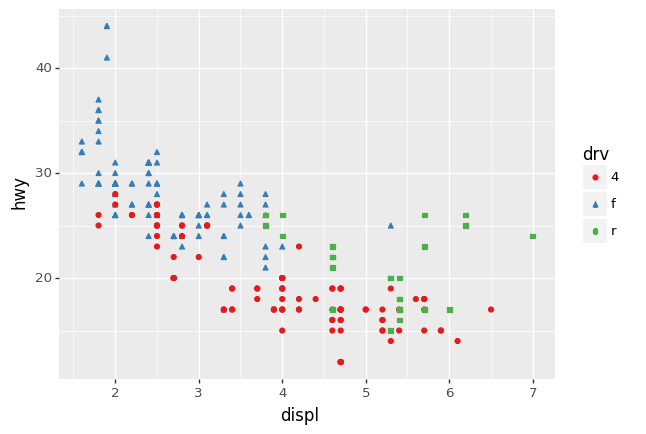

<ggplot: (8732956451663)>

In [227]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv", shape="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## Подробнее цветовые схемы описаны тут: <http://colorbrewer2.org/>.

## А ещё можно задать цвета вручную: `scale_colour_manual()`.

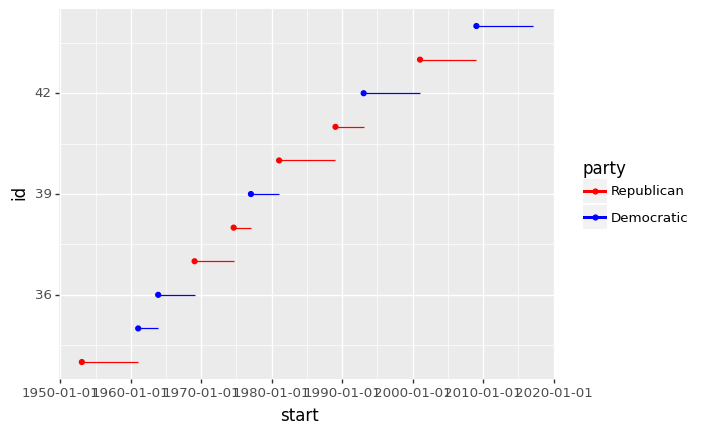

<ggplot: (8732956476751)>

In [228]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["red", "blue"], limits=["Republican", "Democratic"])

### "Ну поиграйте с цветами, вы же дизайнер"

/usr/local/lib/python3.8/dist-packages/mizani/palettes.py:397: UserWarning: Warning message:Brewer palette Set3 has a maximum of 12 colors Returning the palette you asked for with that many colors
/usr/local/lib/python3.8/dist-packages/mizani/palettes.py:397: UserWarning: Warning message:Brewer palette Set3 has a maximum of 12 colors Returning the palette you asked for with that many colors


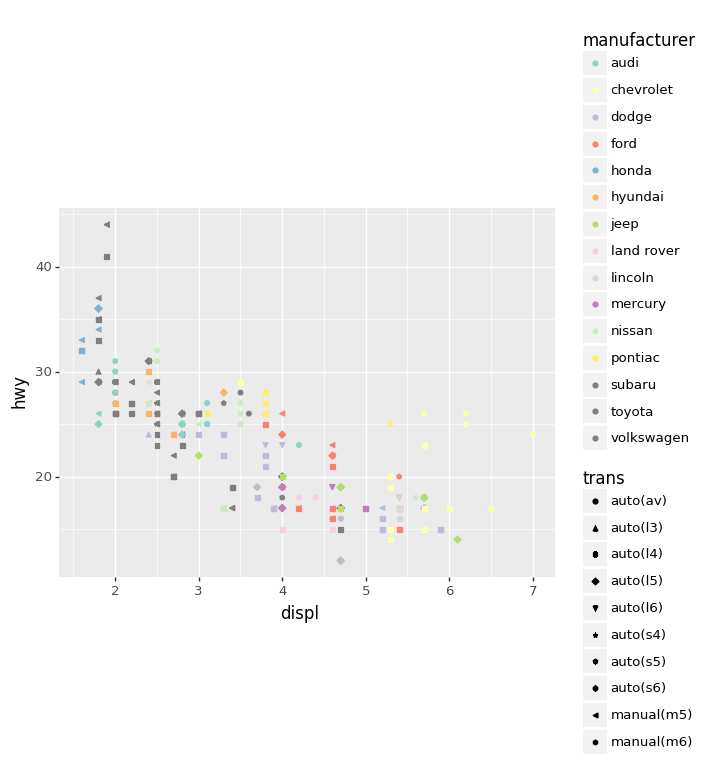

<ggplot: (8732956358909)>

In [229]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="manufacturer", shape="trans")) +\
scale_colour_brewer(type="qual", palette="Set3")

## Иногда результат зависит от пределов значений на графике

/usr/local/lib/python3.8/dist-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


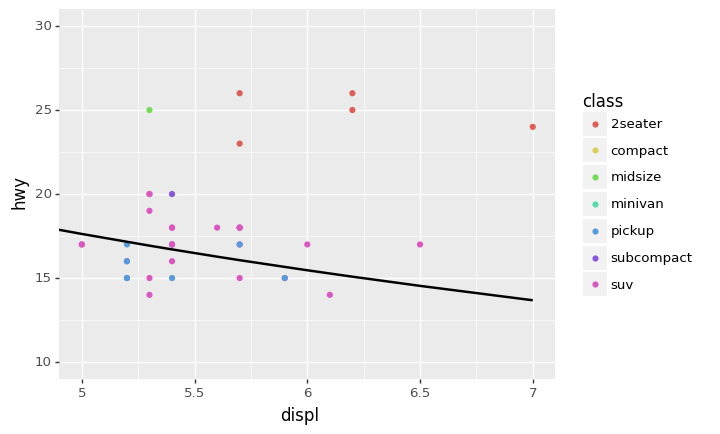

<ggplot: (8732952595987)>

In [230]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth() +\
coord_cartesian(xlim=(5, 7), ylim=(10, 30))

/usr/local/lib/python3.8/dist-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


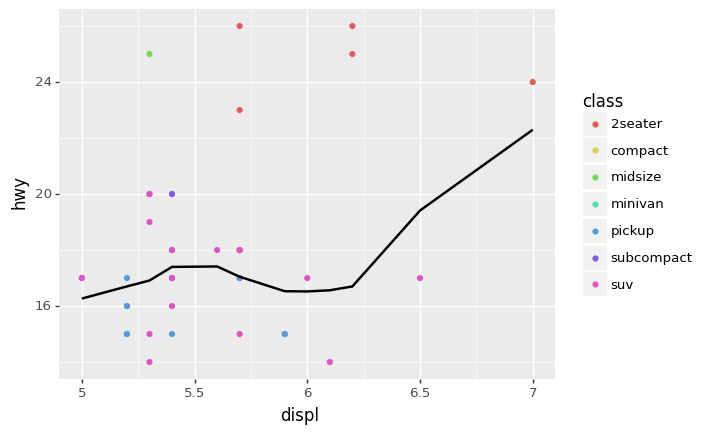

<ggplot: (8732951826249)>

In [231]:
ggplot(mpg.query("5 <= displ <= 7 and 10 <= hwy <= 30"), aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth()

## Когда вы хотите сравнить значения двух графиков с совпадающими осями x и y, имеет смысл зафиксировать макмимальные и минимальные значения на этих осях.

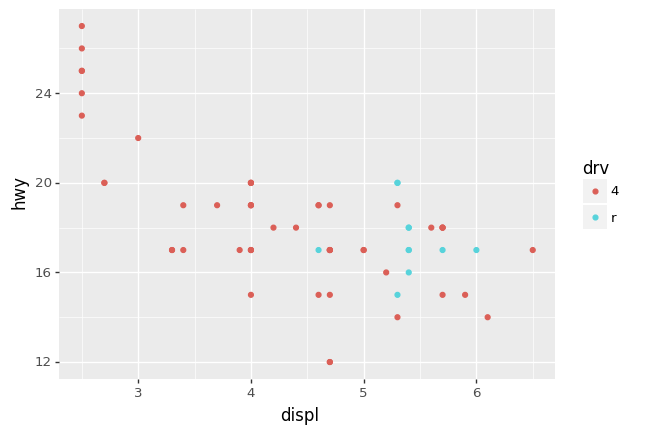

<ggplot: (8732951963667)>

In [232]:
mpg["drv"] = mpg["drv"].astype(str)
suv = mpg[mpg["class"] == "suv"]
compact = mpg[mpg["class"] == "compact"]

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point()

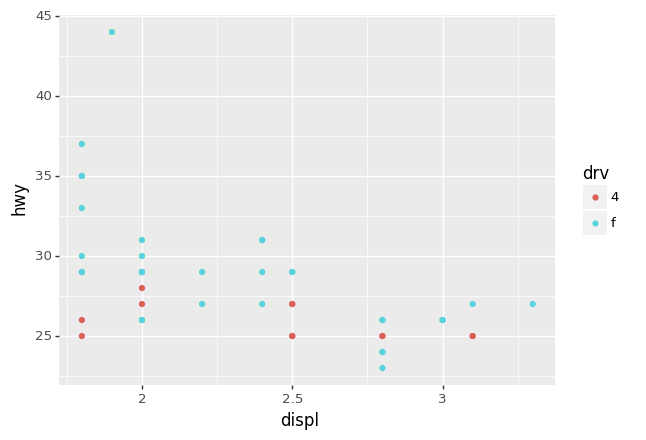

<ggplot: (8732954797487)>

In [233]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point()

## Например, сохранив эти значения в одельную переменную.

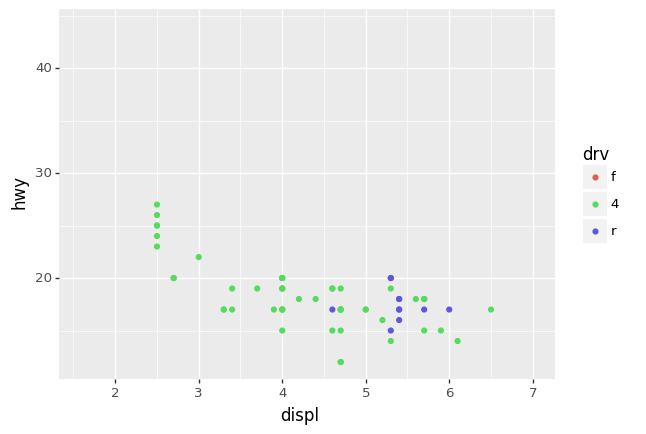

<ggplot: (8732951762104)>

In [234]:
x_scale = scale_x_continuous(limits=(mpg.displ.min(), mpg.displ.max()))
y_scale = scale_y_continuous(limits=(mpg.hwy.min(), mpg.hwy.max()))
col_scale = scale_colour_discrete(limits=mpg.drv.unique())

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

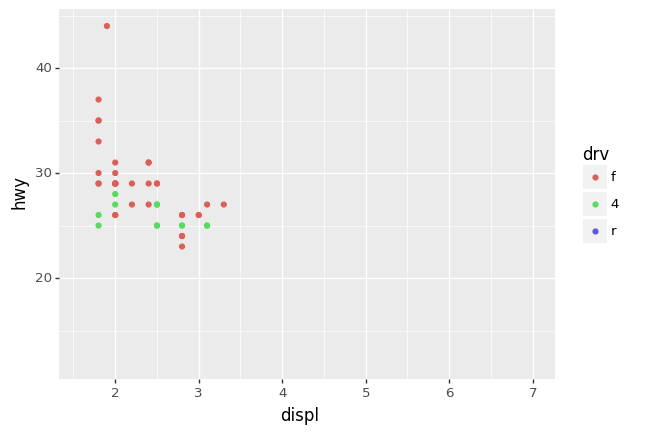

<ggplot: (8732954899116)>

In [235]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

## Внешний вид можно менять настройкой тем

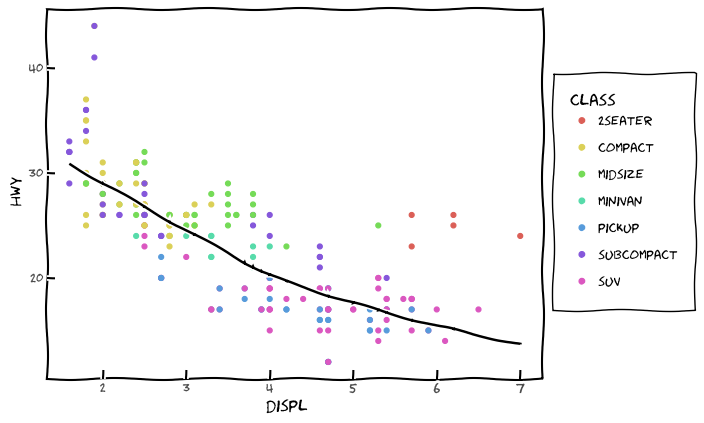

<ggplot: (8732956080616)>

In [236]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
theme_xkcd()

## 

## Сохранить последний нарисованный график можно с использованием:
## `_.save("my-plot.pdf")`
## В качестве настроек используются: `width`, `height`, `units`, и `dpi`. 

## Если кто-то в предыдущей лабораторной не сделал творческое задание – самое время это сделать. Кто сделал – тот молодец!

Задание сделано ещё во второй лабораторной